<a href="https://colab.research.google.com/github/gsb16/hello-world/blob/master/AliPaga-James.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de análise do dataset

## Início 
Importando os dados do kaggle e criando o dataframe

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "gabrielbarreto"
os.environ['KAGGLE_KEY'] = "e1929849b8d7bc9ec00d9ca96b958da3"
!kaggle datasets download -d jr2ngb/superstore-data
!unzip superstore-data.zip 

  0% 0.00/2.74M [00:00<?, ?B/s]
100% 2.74M/2.74M [00:00<00:00, 92.1MB/s]
Archive:  superstore-data.zip
  inflating: superstore_dataset2011-2015.csv  


In [0]:
import pandas as pd
data = pd.read_csv("superstore_dataset2011-2015.csv", encoding = "ISO-8859-1") 

Visualizando todos os dados do dataset

In [33]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [34]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

Separando o dataset dentre os quatro anos

In [0]:
ano_2011 = data[data['Order Date'].str.contains("2011")]
ano_2011['Order Date'] = ano_2011['Order Date'].str.replace('-', '/')
ano_2011['Order Date'] = ano_2011['Order Date'].str.replace('/0', '/')

ano_2012 = data[data['Order Date'].str.contains("2012")]
ano_2012['Order Date'] = ano_2012['Order Date'].str.replace('-', '/')
ano_2012['Order Date'] = ano_2012['Order Date'].str.replace('/0', '/')

ano_2013 = data[data['Order Date'].str.contains("2013")]
ano_2013['Order Date'] = ano_2013['Order Date'].str.replace('-', '/')
ano_2013['Order Date'] = ano_2013['Order Date'].str.replace('/0', '/')

ano_2014 = data[data['Order Date'].str.contains("2014")]
ano_2014['Order Date'] = ano_2014['Order Date'].str.replace('-', '/')
ano_2014['Order Date'] = ano_2014['Order Date'].str.replace('/0', '/')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [0]:
ano_2011['Meses'] = ano_2011['Order Date'].str.split('/', expand = True)[1]
ano_2012['Meses'] = ano_2012['Order Date'].str.split('/', expand = True)[1]
ano_2013['Meses'] = ano_2013['Order Date'].str.split('/', expand = True)[1]
ano_2014['Meses'] = ano_2014['Order Date'].str.split('/', expand = True)[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

## Avaliando o comportamento das vendas
Lucro e vendas por região

In [50]:
import matplotlib.pyplot as plt

data.groupby('Region').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)

,Sales
Region,
Central,2.822303e+06
South,1.600907e+06
North,1.248166e+06
Oceania,1.100185e+06
Southeast Asia,8.844232e+05
North Asia,8.483098e+05
EMEA,8.061613e+05
Africa,7.837732e+05
Central Asia,7.528266e+05


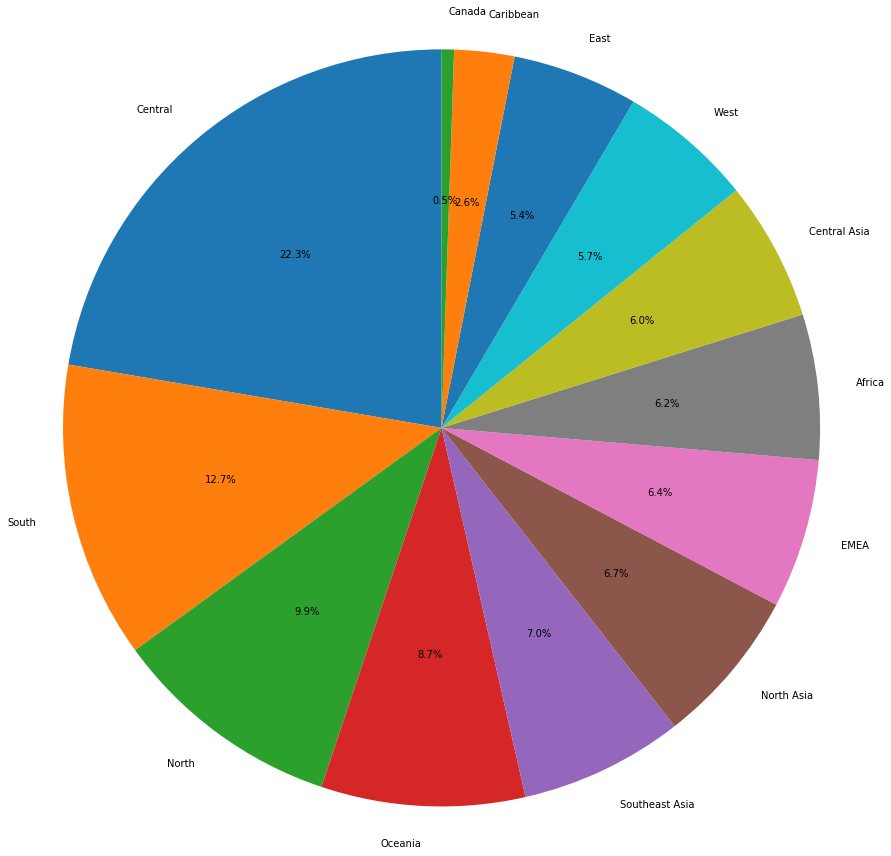

In [56]:
data_by_region = data.groupby('Region', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figReg, ax1 = plt.subplots()
ax1.pie(data_by_region['Sales'], labels=data_by_region['Region'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figReg.set_size_inches(15, 15)
plt.show()

In [48]:
data.groupby('Region').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

,Profit
Region,
Central,311403.98164
North,194597.95252
North Asia,165578.42100
South,140355.76618
Central Asia,132480.18700
Oceania,120089.11200
West,108418.44890
East,91522.78000
Africa,88871.63100


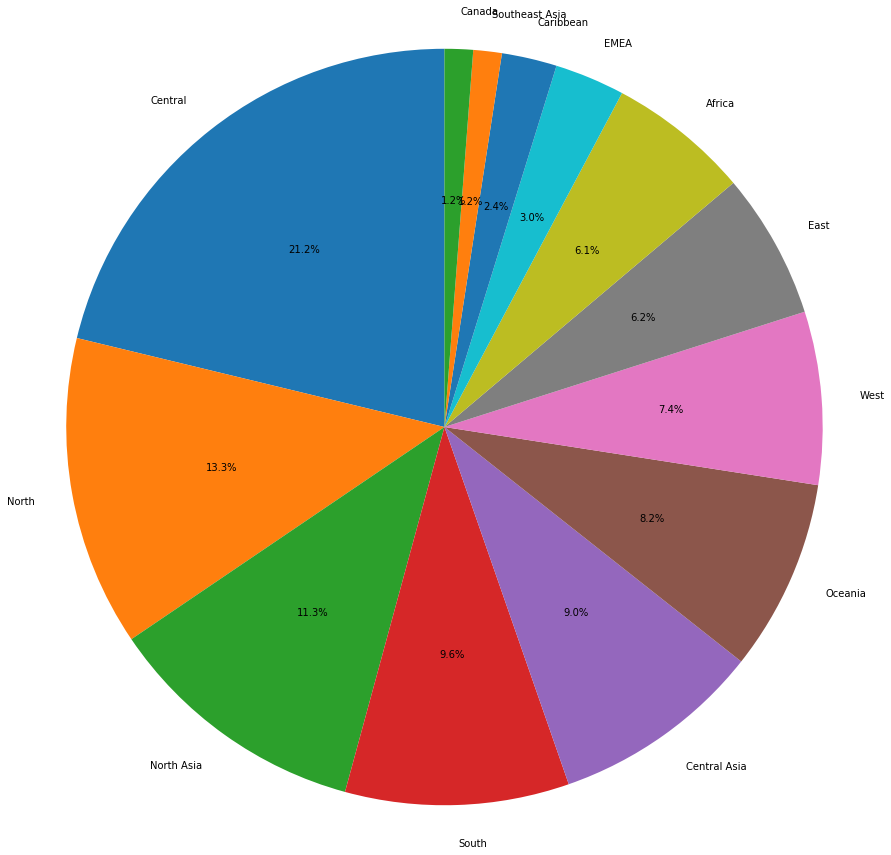

In [57]:
data_by_region = data.groupby('Region', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figReg2, ax1 = plt.subplots()
ax1.pie(data_by_region['Profit'], labels=data_by_region['Region'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figReg2.set_size_inches(15, 15)
plt.show()

Lucro e vendas por Market

In [51]:
data.groupby('Market').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)

,Sales
Market,
APAC,3.585744e+06
EU,2.938089e+06
US,2.297201e+06
LATAM,2.164605e+06
EMEA,8.061613e+05
Africa,7.837732e+05
Canada,6.692817e+04


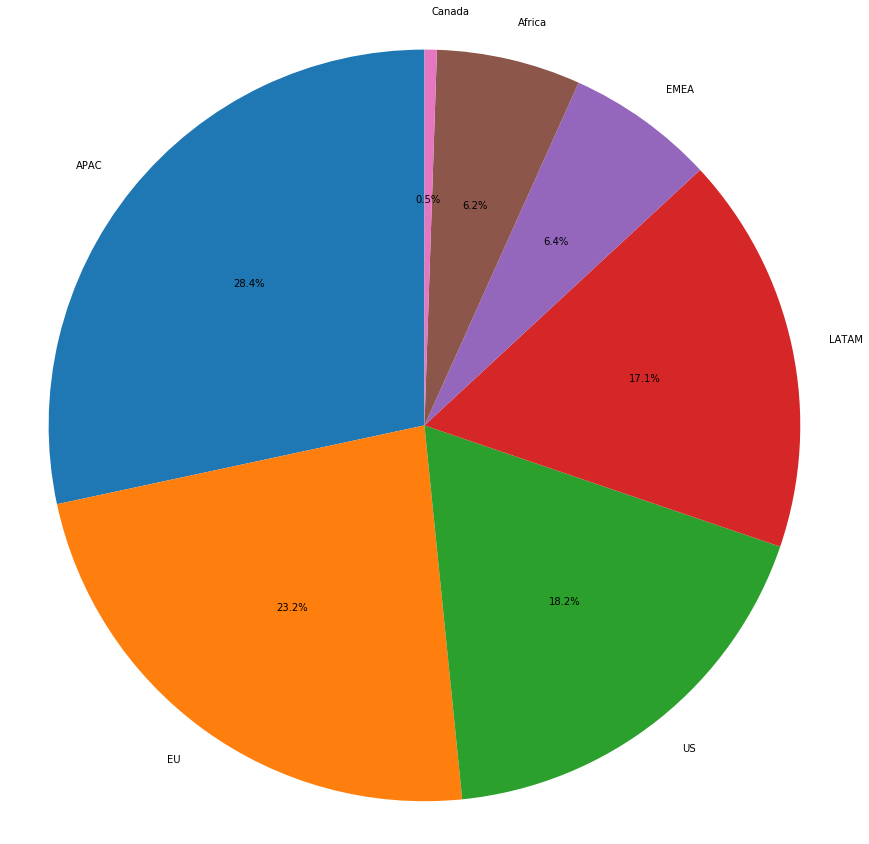

In [59]:
data_by_market = data.groupby('Market', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figMar, ax1 = plt.subplots()
ax1.pie(data_by_market['Sales'], labels=data_by_market['Market'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figMar.set_size_inches(15, 15)
plt.show()

In [53]:
data.groupby('Market').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

,Profit
Market,
APAC,436000.04900
EU,372829.74150
US,286397.02170
LATAM,221643.48708
Africa,88871.63100
EMEA,43897.97100
Canada,17817.39000


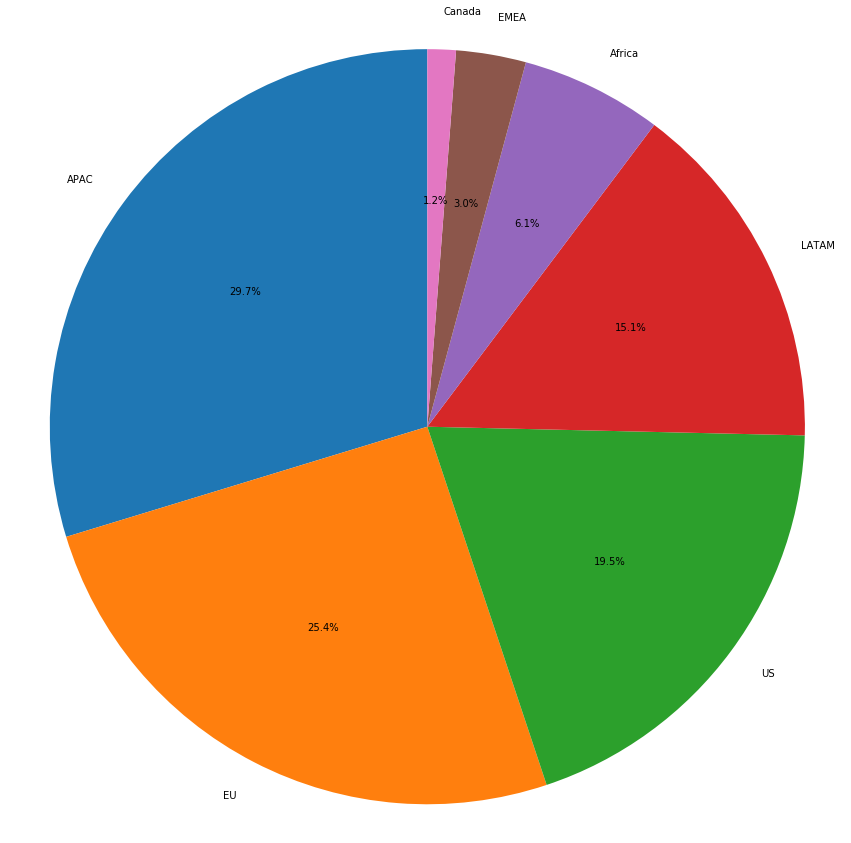

In [62]:
data_by_market = data.groupby('Market', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figMar2, ax1 = plt.subplots()
ax1.pie(data_by_market['Profit'], labels=data_by_market['Market'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figMar2.set_size_inches(15, 15)
plt.show()

In [377]:
detalhes = data.groupby('Market', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'sum', 'Shipping Cost': 'sum'})
detalhes['Profit(%)'] = detalhes['Profit'] / detalhes['Sales']
detalhes.sort_values('Profit(%)')

,Market,Sales,Profit,Discount,Shipping Cost,Profit(%)
3,EMEA,8.061613e+05,43897.97100,986.100,88375.73,0.054453
5,LATAM,2.164605e+06,221643.48708,1395.158,234138.61,0.102394
1,Africa,7.837732e+05,88871.63100,718.800,88139.47,0.113389
0,APAC,3.585744e+06,436000.04900,1637.530,387165.11,0.121593
6,US,2.297201e+06,286397.02170,1561.090,238173.79,0.124672
4,EU,2.938089e+06,372829.74150,1031.050,309422.35,0.126895
2,Canada,6.692817e+04,17817.39000,0.000,7405.63,0.266217


Lucro e vendas por país

In [61]:
data.groupby('Country').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
...,...
Tajikistan,2.427840e+02
Macedonia,2.096400e+02
Eritrea,1.877400e+02


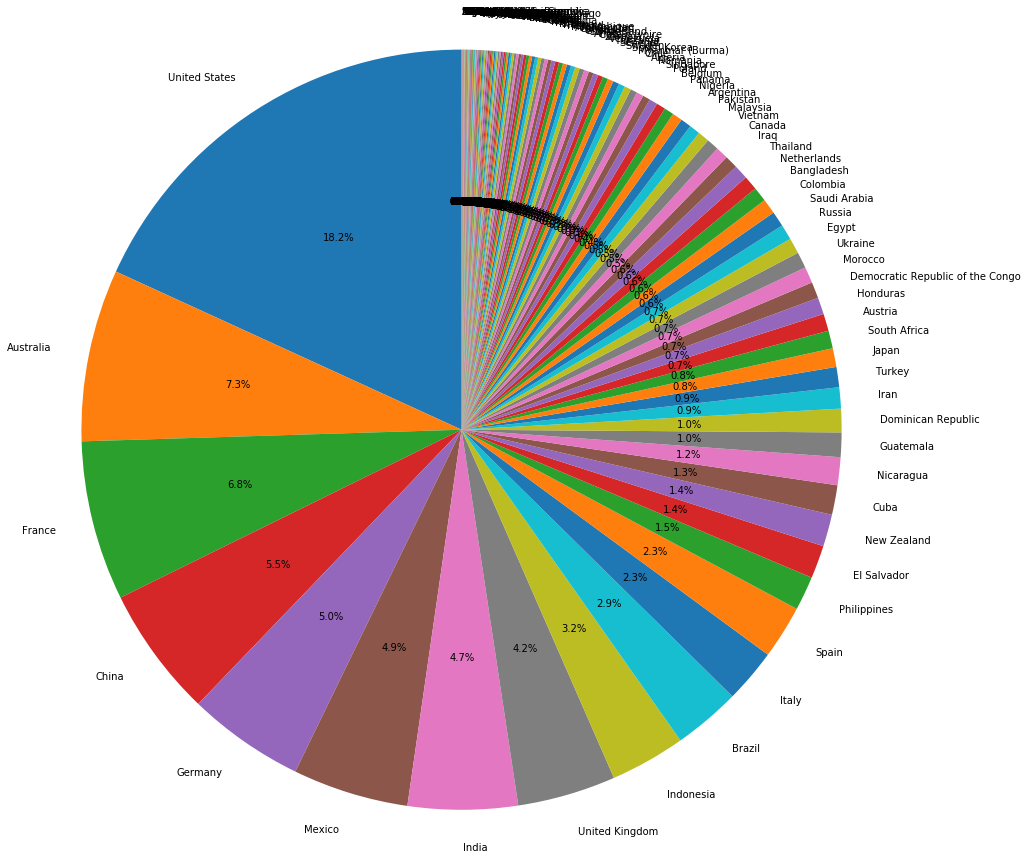

In [63]:
data_by_country = data.groupby('Country', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figCou, ax1 = plt.subplots()
ax1.pie(data_by_country['Sales'], labels=data_by_country['Country'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figCou.set_size_inches(15, 15)
plt.show()

In [73]:
data.groupby('Country').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

,Profit
Country,
United States,286397.0217
China,150683.0850
India,129071.8350
United Kingdom,111900.1500
France,109029.0030
...,...
Pakistan,-22446.6480
Honduras,-29482.3714
Netherlands,-41070.0750


In [79]:
data.groupby('Country').agg({'Profit': 'sum'}).sort_values('Profit', ascending=True).head(25)

,Profit
Country,
Turkey,-98447.23200
Nigeria,-80750.71800
Netherlands,-41070.07500
Honduras,-29482.37140
Pakistan,-22446.64800
Argentina,-18693.79672
Panama,-17723.45248
Sweden,-17519.36700
Philippines,-16128.22500


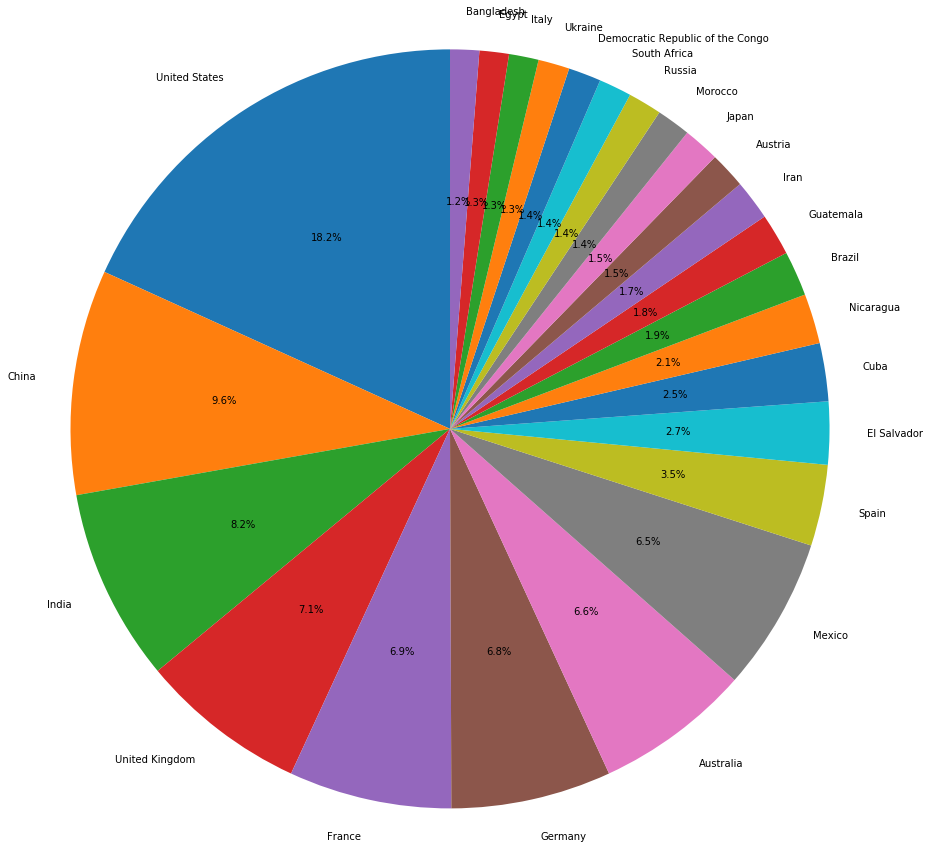

In [74]:
data_by_country = data.groupby('Country', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False).head(25)
figCou2, ax1 = plt.subplots()
ax1.pie(data_by_country['Profit'], labels=data_by_country['Country'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figCou2.set_size_inches(15, 15)
plt.show()

In [381]:
detalhes = data.groupby('Country', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'sum', 'Shipping Cost': 'sum'})
detalhes['Profit(%)'] = detalhes['Profit'] / detalhes['Sales']
detalhes.sort_values('Profit(%)').tail(15)

,Country,Sales,Profit,Discount,Shipping Cost,Profit(%)
84,Montenegro,4004.37000,1286.76000,0.000,375.75,0.321339
70,Lebanon,2796.66000,908.40000,0.000,451.13,0.324816
8,Azerbaijan,5631.51000,1831.05000,0.000,856.91,0.325144
49,Guadeloupe,1461.64000,476.20000,0.000,207.90,0.325798
131,Trinidad and Tobago,6881.16448,2300.48448,3.504,654.36,0.334316
34,Djibouti,2392.95000,804.09000,0.000,304.40,0.336025
12,Belarus,13386.09000,4534.26000,0.000,1437.58,0.338729
69,Kyrgyzstan,5106.30000,1735.32000,0.000,487.95,0.339839
42,Ethiopia,850.62000,290.16000,0.000,81.54,0.341116
132,Tunisia,1760.79000,602.10000,0.000,215.95,0.341949


Lucro e vendas por Segmento

In [362]:
data.groupby('Segment').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)

,Sales
Segment,
Consumer,6.507949e+06
Corporate,3.824698e+06
Home Office,2.309855e+06


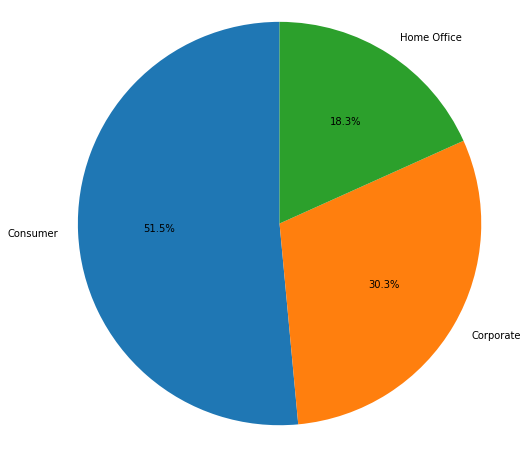

In [363]:
data_by_cat = data.groupby('Segment', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figCat, ax1 = plt.subplots()
ax1.pie(data_by_cat['Sales'], labels=data_by_cat['Segment'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figCat.set_size_inches(8, 8)
plt.show()

In [364]:
data.groupby('Segment').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

,Profit
Segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


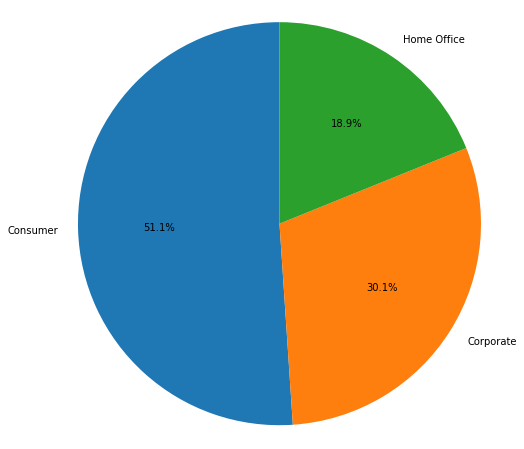

In [365]:
data_by_cat = data.groupby('Segment', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figCat2, ax1 = plt.subplots()
ax1.pie(data_by_cat['Profit'], labels=data_by_cat['Segment'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figCat2.set_size_inches(8, 8)
plt.show()

Lucro e vendas por categoria de produtos

In [0]:
data.groupby('Category').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)

,Sales
Category,
Technology,4.744557e+06
Furniture,4.110874e+06
Office Supplies,3.787070e+06


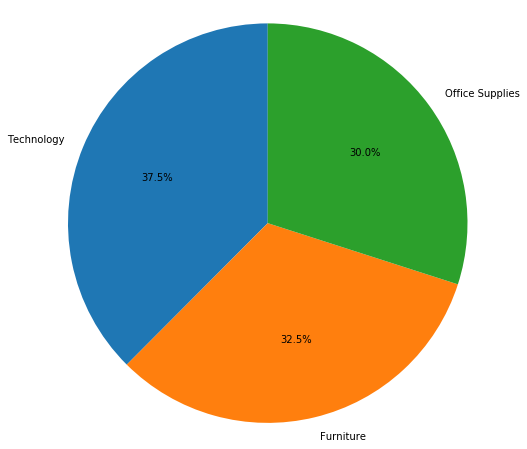

In [0]:
data_by_cat = data.groupby('Category', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figCat, ax1 = plt.subplots()
ax1.pie(data_by_cat['Sales'], labels=data_by_cat['Category'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figCat.set_size_inches(8, 8)
plt.show()

In [0]:
data.groupby('Category').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


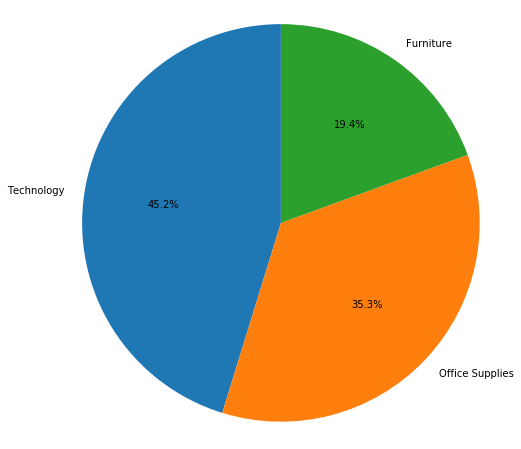

In [0]:
data_by_cat = data.groupby('Category', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figCat2, ax1 = plt.subplots()
ax1.pie(data_by_cat['Profit'], labels=data_by_cat['Category'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figCat2.set_size_inches(8, 8)
plt.show()

Lucro e vendas por sub-categoria de produtos

In [84]:
data.groupby('Sub-Category').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)

,Sales
Sub-Category,
Phones,1.706824e+06
Copiers,1.509436e+06
Chairs,1.501682e+06
Bookcases,1.466572e+06
Storage,1.127086e+06
Appliances,1.011064e+06
Machines,7.790601e+05
Tables,7.570419e+05
Accessories,7.492370e+05


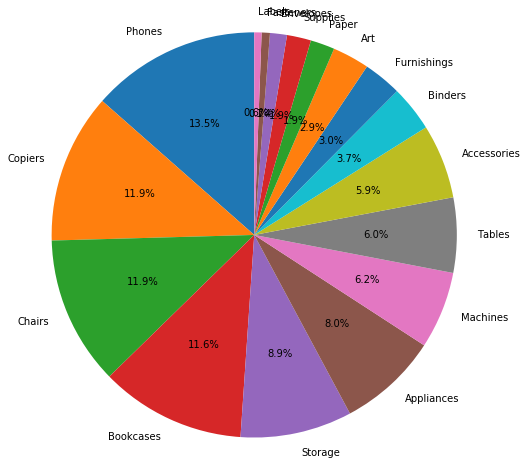

In [88]:
data_by_scat = data.groupby('Sub-Category', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figSCat, ax1 = plt.subplots()
ax1.pie(data_by_scat['Sales'], labels=data_by_scat['Sub-Category'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figSCat.set_size_inches(8, 8)
plt.show()

In [86]:
data.groupby('Sub-Category').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

,Profit
Sub-Category,
Copiers,258567.54818
Phones,216717.00580
Bookcases,161924.41950
Appliances,141680.58940
Chairs,140396.26750
Accessories,129626.30620
Storage,108461.48980
Binders,72449.84600
Paper,59207.68270


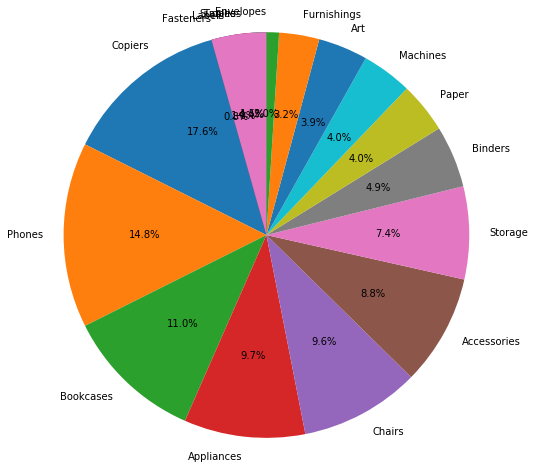

In [87]:
data_by_scat = data.groupby('Sub-Category', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figSCat2, ax1 = plt.subplots()
ax1.pie(data_by_scat['Profit'], labels=data_by_scat['Sub-Category'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figSCat2.set_size_inches(8, 8)
plt.show()

Lucro e vendas por ano

In [155]:
ano_2011.groupby('Meses').agg({'Sales': 'sum', 'Profit': 'sum'})

,Sales,Profit
Meses,,
1,98898.48886,8321.80096
10,199071.26404,25963.41834
11,298496.53752,32709.17772
12,333925.73460,40647.98400
2,91152.15698,12417.90698
3,145729.36736,15303.56826
4,116915.76418,12902.32438
5,146747.83610,12183.82870
6,215207.38022,23415.24702


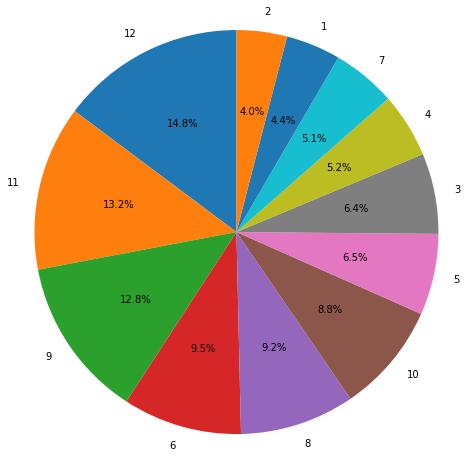

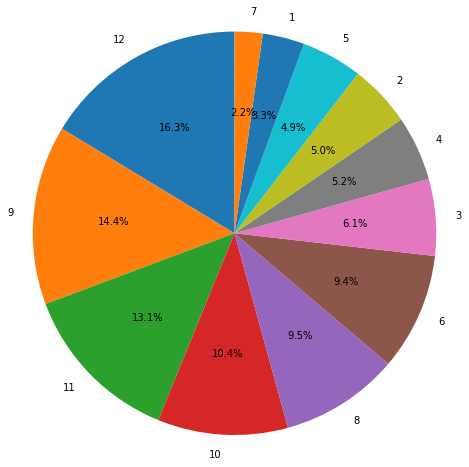

In [156]:
data_by_m11 = ano_2011.groupby('Meses', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figM11, ax1 = plt.subplots()
ax1.pie(data_by_m11['Sales'], labels=data_by_m11['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM11.set_size_inches(8, 8)
plt.show()
data_by_m11 = ano_2011.groupby('Meses', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figM112, ax1 = plt.subplots()
ax1.pie(data_by_m11['Profit'], labels=data_by_m11['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM112.set_size_inches(8, 8)
plt.show()

In [157]:
ano_2012.groupby('Meses').agg({'Sales': 'sum', 'Profit': 'sum'})

,Sales,Profit
Meses,,
1,135780.72024,10401.63764
10,252939.85020,30662.88270
11,323512.41690,31820.72180
12,338256.96660,32950.75130
2,100510.21698,15000.09618
3,163076.77116,17992.91756
4,161052.26952,17366.96722
5,208364.89124,29876.70374
6,256175.69842,34407.15362


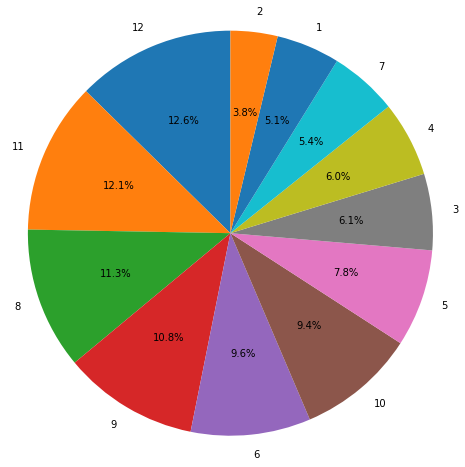

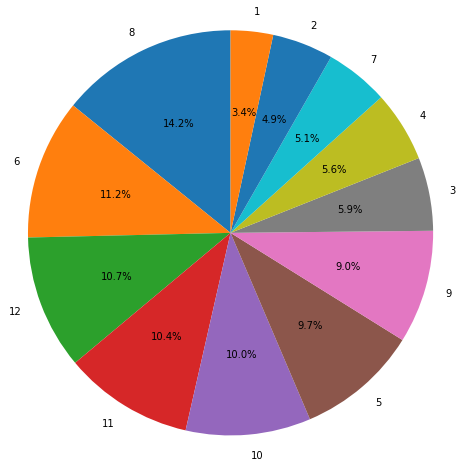

In [158]:
data_by_m12 = ano_2012.groupby('Meses', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figM12, ax1 = plt.subplots()
ax1.pie(data_by_m12['Sales'], labels=data_by_m12['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM12.set_size_inches(8, 8)
plt.show()
data_by_m12 = ano_2012.groupby('Meses', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figM122, ax1 = plt.subplots()
ax1.pie(data_by_m12['Profit'], labels=data_by_m12['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM122.set_size_inches(8, 8)
plt.show()

In [159]:
ano_2013.groupby('Meses').agg({'Sales': 'sum', 'Profit': 'sum'})

,Sales,Profit
Meses,,
1,199185.90738,26810.55968
10,293406.64288,42433.22258
11,373989.36010,48062.99670
12,405454.37802,50202.87112
2,167239.65040,23762.49610
3,198594.03012,23433.77462
4,177821.31684,19462.03844
5,260498.56470,28495.69410
6,396519.61190,45478.41340


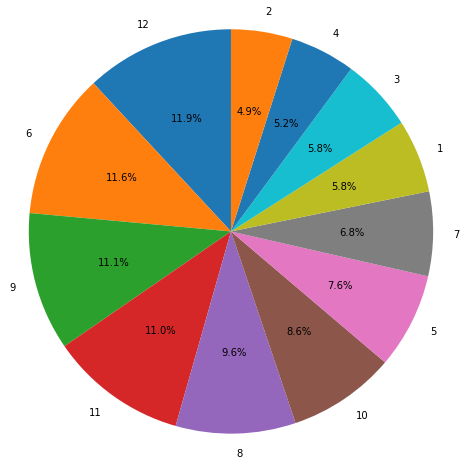

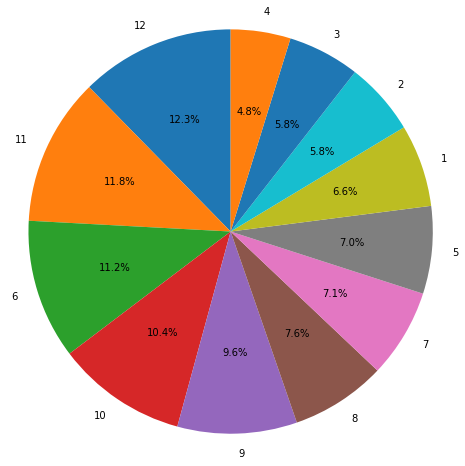

In [160]:
data_by_m13 = ano_2013.groupby('Meses', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figM13, ax1 = plt.subplots()
ax1.pie(data_by_m13['Sales'], labels=data_by_m13['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM13.set_size_inches(8, 8)
plt.show()
data_by_m13 = ano_2013.groupby('Meses', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figM132, ax1 = plt.subplots()
ax1.pie(data_by_m13['Profit'], labels=data_by_m13['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM132.set_size_inches(8, 8)
plt.show()

In [161]:
ano_2014.groupby('Meses').agg({'Sales': 'sum', 'Profit': 'sum'})

,Sales,Profit
Meses,,
1,241268.55566,28001.38626
10,422766.62916,58209.83476
11,555279.02700,62856.58790
12,503143.69348,46916.52068
2,184837.35556,19751.69996
3,263100.77262,37357.26052
4,242771.86130,23782.30120
5,288401.04614,33953.55774
6,401814.06310,43778.60280


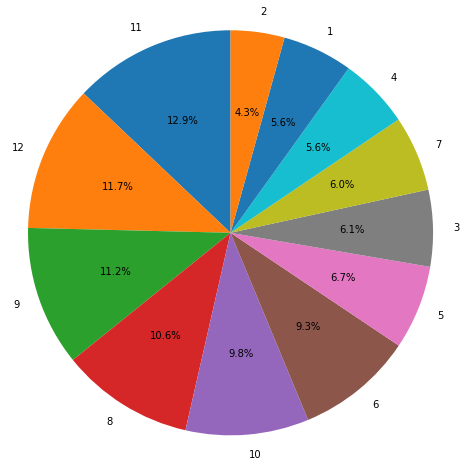

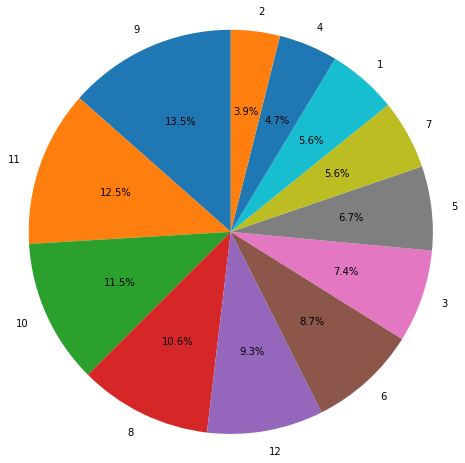

In [162]:
data_by_m14 = ano_2014.groupby('Meses', as_index=False).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
figM14, ax1 = plt.subplots()
ax1.pie(data_by_m14['Sales'], labels=data_by_m14['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM14.set_size_inches(8, 8)
plt.show()
data_by_m14 = ano_2014.groupby('Meses', as_index=False).agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
figM142, ax1 = plt.subplots()
ax1.pie(data_by_m14['Profit'], labels=data_by_m14['Meses'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
figM142.set_size_inches(8, 8)
plt.show()

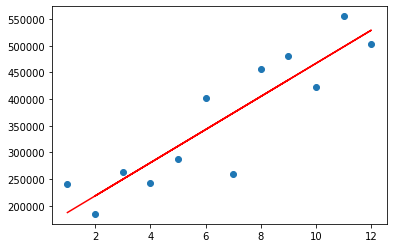

In [215]:
from sklearn.linear_model import LinearRegression
import numpy as np
vendas = ano_2014.groupby('Meses', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum'})
vendas['Meses'] = vendas['Meses'].astype(int)
vendas['Sales'] = vendas['Sales'].astype(int)
X = pd.DataFrame(vendas['Meses'])
Y = pd.DataFrame(vendas['Sales'])
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [279]:
ano_2011['Meses'] = ano_2011['Meses'].astype(int)
vendas = ano_2011.groupby('Meses', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Meses', ascending=True)
vendas['Sales'] = vendas['Sales'].astype(int)
vendas['Profit'] = vendas['Profit'].astype(int)
tudo = vendas

ano_2012['Meses'] = ano_2012['Meses'].astype(int)
vendas = ano_2012.groupby('Meses', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Meses', ascending=True)
vendas['Meses'] = vendas['Meses'].astype(int) + 12
vendas['Sales'] = vendas['Sales'].astype(int)
vendas['Profit'] = vendas['Profit'].astype(int)
tudo = tudo.append(vendas, ignore_index=True)

ano_2013['Meses'] = ano_2013['Meses'].astype(int)
vendas = ano_2013.groupby('Meses', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Meses', ascending=True)
vendas['Meses'] = vendas['Meses'].astype(int) + 24
vendas['Sales'] = vendas['Sales'].astype(int)
vendas['Profit'] = vendas['Profit'].astype(int)
tudo = tudo.append(vendas, ignore_index=True)

ano_2014['Meses'] = ano_2014['Meses'].astype(int)
vendas = ano_2014.groupby('Meses', as_index=False).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Meses', ascending=True)
vendas['Meses'] = vendas['Meses'].astype(int) + 36
vendas['Sales'] = vendas['Sales'].astype(int)
vendas['Profit'] = vendas['Profit'].astype(int)
tudo = tudo.append(vendas, ignore_index=True)

tudo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Meses,Sales,Profit
0,1,98898,8321
1,2,91152,12417
2,3,145729,15303
3,4,116915,12902
4,5,146747,12183
5,6,215207,23415
6,7,115510,5585
7,8,207581,23713
8,9,290214,35776
9,10,199071,25963


    Meses
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
30     31
31     32
32     33
33     34
34     35
35     36
36     37
37     38
38     39
39     40
40     41
41     42
42     43
43     44
44     45
45     46
46     47
47     48


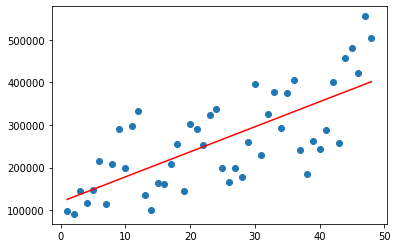

In [280]:
X = pd.DataFrame(tudo['Meses']).sort_values(by='Meses')
print(X)
Y = pd.DataFrame(tudo['Sales'])
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

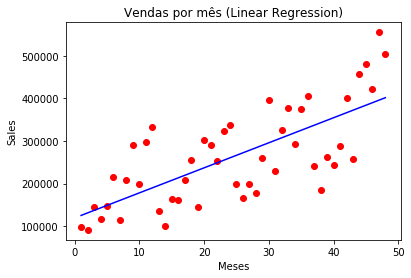

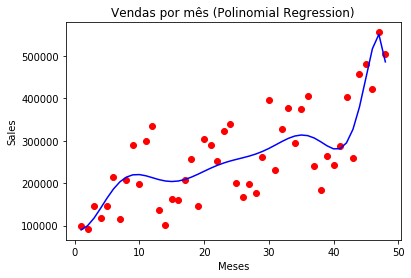

[[407469.5070922]]
[[215440.29919867]]


In [295]:
import numpy as np
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 

tudo = tudo[['Meses', 'Sales']]
train, test = train_test_split(tudo, test_size=0.2)

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, Y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Vendas por mês (Linear Regression)')
    plt.xlabel('Meses')
    plt.ylabel('Sales')
    plt.show()
    return
viz_linear()

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, Y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Vendas por mês (Polinomial Regression)')
    plt.xlabel('Meses')
    plt.ylabel('Sales')
    plt.show()
    return
viz_polymonial()

print(lin_reg.predict([[49]]))

print(pol_reg.predict(poly_reg.fit_transform([[49]])))


## Investigando a relação de fretes e desconto

In [313]:
ship_vs_disc = data[['Market', 'Sales', 'Profit', 'Discount', 'Shipping Cost']]
ship_vs_disc.groupby('Market').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Sales', ascending=False)

,Sales,Profit,Discount,Shipping Cost
Market,,,,
APAC,3.585744e+06,436000.04900,0.148839,35.190430
EU,2.938089e+06,372829.74150,0.103105,30.942235
US,2.297201e+06,286397.02170,0.156203,23.831678
LATAM,2.164605e+06,221643.48708,0.135531,22.745153
EMEA,8.061613e+05,43897.97100,0.196083,17.573221
Africa,7.837732e+05,88871.63100,0.156704,19.215058
Canada,6.692817e+04,17817.39000,0.000000,19.285495


In [314]:
ship_vs_disc.groupby('Market').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Profit', ascending=False)

,Sales,Profit,Discount,Shipping Cost
Market,,,,
APAC,3.585744e+06,436000.04900,0.148839,35.190430
EU,2.938089e+06,372829.74150,0.103105,30.942235
US,2.297201e+06,286397.02170,0.156203,23.831678
LATAM,2.164605e+06,221643.48708,0.135531,22.745153
Africa,7.837732e+05,88871.63100,0.156704,19.215058
EMEA,8.061613e+05,43897.97100,0.196083,17.573221
Canada,6.692817e+04,17817.39000,0.000000,19.285495


In [315]:
ship_vs_disc.groupby('Market').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Discount', ascending=False)

,Sales,Profit,Discount,Shipping Cost
Market,,,,
EMEA,8.061613e+05,43897.97100,0.196083,17.573221
Africa,7.837732e+05,88871.63100,0.156704,19.215058
US,2.297201e+06,286397.02170,0.156203,23.831678
APAC,3.585744e+06,436000.04900,0.148839,35.190430
LATAM,2.164605e+06,221643.48708,0.135531,22.745153
EU,2.938089e+06,372829.74150,0.103105,30.942235
Canada,6.692817e+04,17817.39000,0.000000,19.285495


In [316]:
ship_vs_disc.groupby('Market').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Shipping Cost', ascending=True)

,Sales,Profit,Discount,Shipping Cost
Market,,,,
EMEA,8.061613e+05,43897.97100,0.196083,17.573221
Africa,7.837732e+05,88871.63100,0.156704,19.215058
Canada,6.692817e+04,17817.39000,0.000000,19.285495
LATAM,2.164605e+06,221643.48708,0.135531,22.745153
US,2.297201e+06,286397.02170,0.156203,23.831678
EU,2.938089e+06,372829.74150,0.103105,30.942235
APAC,3.585744e+06,436000.04900,0.148839,35.190430


In [329]:
data['Sales'].corr(data['Discount'], method='spearman', min_periods=50)

-0.10011178201602078

In [347]:
data['Sales'].corr(data['Shipping Cost'], method='spearman', min_periods=50)

0.9132607761357002

In [353]:
temp = data.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Sales', ascending=False)
temp.corr(method='spearman', min_periods=50)

,Sales,Profit,Discount,Shipping Cost
Sales,1.000000,0.585577,0.306555,0.261706
Profit,0.585577,1.000000,-0.323660,0.434684
Discount,0.306555,-0.323660,1.000000,-0.206495
Shipping Cost,0.261706,0.434684,-0.206495,1.000000


In [354]:
temp = data.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Sales', ascending=False)
temp.corr(method='spearman', min_periods=50)

,Sales,Profit,Discount,Shipping Cost
Sales,1.000000,0.642997,0.094131,0.652934
Profit,0.642997,1.000000,-0.413595,0.531689
Discount,0.094131,-0.413595,1.000000,-0.062037
Shipping Cost,0.652934,0.531689,-0.062037,1.000000


In [368]:
temp = data.groupby('Customer Name').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean', 'Shipping Cost': 'mean'}).sort_values('Sales', ascending=False)
temp.corr(method='spearman', min_periods=50)

,Sales,Profit,Discount,Shipping Cost
Sales,1.000000,0.487945,-0.089970,0.568726
Profit,0.487945,1.000000,-0.464842,0.364486
Discount,-0.089970,-0.464842,1.000000,-0.105840
Shipping Cost,0.568726,0.364486,-0.105840,1.000000
